[View in Colaboratory](https://colab.research.google.com/github/rainu1729/data-analysis/blob/master/EDXcourse600_2x.ipynb)

###edx course 600.2x
### knapsack problem , greedy algo

In [0]:
class food(object):
    '''the food class it contains the name of the food followed by  its value and the calories
    there is init function, getters and rewritten __str__ fun'''
    def __init__(self,name,value,cost):
        self.name=name
        self.value=value
        self.calories=cost
    
    def getname(self):
        return self.name
    
    def getvalue(self):
        return self.value

    def getcalories(self):
        return self.calories

    def getcalpervalue(self):
        return self.calories/self.value

    def __str__(self):
        return self.name+' <'+str(self.value)+','+str(self.calories)+'>'

#### build the menu using the food

In [0]:
def themenu(name,value,calorie):
    """the menu is build using the food class and returns a list
    the name,value and calorie are list of same length
    """
    menu =[]
    for i in range(len(name)):
        menu.append(food(name[i],value[i],calorie[i]))
    return menu

### the greedy algo in form of a function

In [0]:
def greedy(items,maxcost,keyfunction):
    """items is a list of menu, maxcost is a positive number
    based on the keyfunction a new list of items is created"""
    itemscopy =  sorted(items,key=keyfunction,reverse=True)
    result = []
    totalvalue,totalcal= 0.0,0.0
    for i in range(len(itemscopy)):
        if(totalcal+itemscopy[i].getcalories()<=maxcost):
            result.append(itemscopy[i])
            totalcal+=itemscopy[i].getcalories()
            totalvalue+=itemscopy[i].getvalue()
    
    return (result,totalvalue,totalcal)

** test the greedy function**

In [0]:
def testGreedy(items,constraint,keyFunction):
    """test function inputs are 
    items i.e the menu in form of a python list
    constraint as the max calorie value 
    the sorting keyfunction i.e any of the item parameter like calories,value,calories per value
    """
    taken,val,cal = greedy(items,constraint,keyFunction)
    print('total value of items taken ',val,' total cal ',cal)
    for item in taken:
        print(' ',item)

def testGreedys(foods,maxUnit):
    """RUN THE testGreedy function with diff keyfunctions and a fixed constraint
    the input is the foods a list containing object of type food.
    max calorie value which should not be exceed
    """
    print('use greedy by value to allocate ',maxUnit,' calories')
    testGreedy(foods,maxUnit,lambda x:food.getvalue(x))
    print('--------------------------------------------------------')
    print('use greedy by cost(calorie) to allocate ',maxUnit,' calories')
    testGreedy(foods,maxUnit,lambda x:1/food.getcalories(x))
    print('------------------------------------------------------')
    print('use greedy by density to allcocate ',maxUnit,' calories')
    testGreedy(foods,maxUnit,lambda x:food.getcalpervalue(x))

Sample data

In [0]:
name = ['wine','beer','pizza','burger','fries','coke','apple','donut']
value = [89,90,30,50,90,79,90,10]
calories = [123,154,258,354,365,150,95,195]

myfood=themenu(name,value,calories)

### implementing the brute force method to find the best fit

In [0]:
def maxVal(toConsider,avail):
    '''
    returns a tuple with items to take and its value
    inputs:
    toConsider : a list of available items
    avail      : available space
    '''
    if toConsider ==[] or avail ==0:
        ## returns a tuple with 0- value and empty items with the items toConsider is None or available space is zero.
        result =(0,0,())
    elif toConsider[0].getcalories() > avail:
        ## call the same maxVal function without current item if the current items calories is greater than available space.
        result = maxVal(toConsider[1:],avail)
    else:
        ## if the current item calories is below the available limit
        nextItem=toConsider[0]
        ## call the maxVal excluding the current item and reducing the available space
        withVal,withCal,withtoTake = maxVal(toConsider[1:],avail-nextItem.getcalories())
        withVal +=nextItem.getvalue()
        withCal +=nextItem.getcalories()
        ## considering the possiblity of exluding the current item and having the same available space
        withoutVal,withoutCal,withoutToTake=maxVal(toConsider[1:],avail)
        ## compare which is better in terms of maximizing the value with or without the current item.
        if withVal> withoutVal:
            result =(withVal,withCal,withtoTake+(nextItem,))
        else:
            result =(withoutVal,withoutCal,withoutToTake)
    return result

### CREATING A RANDOM LIST OF FOOD , ITS VALUE AND CALORIE so that  MENU can be created 


In [0]:
def crListMenu(itemcount):
    '''
    returns a list with itemcount no of items as menu
    '''
    import itertools as it
    from random import randint
    string='Abcdefghijklmnopqsrstuvwxyz'
    comps=it.permutations(string, 4)
    food=[]
    value=[]
    calories=[]
    for i in range(itemcount):
        food.append(''.join(next(comps)))
        value.append(randint(5,89))
        calories.append(randint(91,208))
    myfood=themenu(food,value,calories)
    return myfood

####using the dyamic programming create a fast version of maxVal

In [0]:
def fastMaxVal(toConsider,avail,memo={}):
    '''
    toConsider : list of items from menu
    avail      : available space in menu
    mem        : is a dictonary storing key values
    '''
    if (len(toConsider),avail) in memo:
        result = memo[(len(toConsider),avail)]
    elif toConsider == [] or avail ==0:
        result =(0,0,())
    elif toConsider[0].getcalories() > avail:
        result = fastMaxVal(toConsider[1:],avail,memo)
    else:
        ## if the current item calories is below the available limit
        nextItem=toConsider[0]
        ## call the maxVal excluding the current item and reducing the available space
        withVal,withCal,withtoTake = fastMaxVal(toConsider[1:],avail-nextItem.getcalories(),memo)
        withVal +=nextItem.getvalue()
        withCal +=nextItem.getcalories()
        ## considering the possiblity of exluding the current item and having the same available space
        withoutVal,withoutCal,withoutToTake=fastMaxVal(toConsider[1:],avail,memo)
        ## compare which is better in terms of maximizing the value with or without the current item.
        if withVal> withoutVal:
            result =(withVal,withCal,withtoTake+(nextItem,))
        else:
            result =(withoutVal,withoutCal,withoutToTake)
    memo[(len(toConsider),avail)] = result 
    return result

## test max val

In [0]:
def testMaxVal(foods,maxUnits,algo,printItems= True):
    print('Using search tree to alloacate ',maxUnits,' calories')
    val,cal,taken=algo(foods,maxUnits)
    print('total value of items taken ',val,' total cal ',cal)
    if printItems:
        for item in taken:
            print(' ',item)

### creating menu with n items and testing the algos

In [0]:
for numitems in (2,4,8,32,64,128,256,512,1024):
    items = crListMenu(numitems)
    testMaxVal(items,750,fastMaxVal)

Using serach tree to alloacate  750  calories
total value of items taken  80  total cal  237
  Abce <44,111>
  Abcd <36,126>
Using serach tree to alloacate  750  calories
total value of items taken  174  total cal  568
  Abcg <65,164>
  Abcf <22,201>
  Abce <63,97>
  Abcd <24,106>
Using serach tree to alloacate  750  calories
total value of items taken  374  total cal  725
  Abcj <67,138>
  Abci <64,179>
  Abch <87,114>
  Abcg <83,110>
  Abcf <73,184>
Using serach tree to alloacate  750  calories
total value of items taken  502  total cal  745
  Abdh <88,115>
  Abcv <80,99>
  Abcr <82,143>
  Abcj <86,156>
  Abch <81,139>
  Abcg <85,93>


# Graph class

####Node class

In [0]:
class Node(object):
    ''' Node class with single attribute name'''
    def __init__(self,name):
        self.name=name
    
    def getName(self):
        return self.name

    def __str__(self):
        return self.name

####Edge class

In [0]:
class Edge(object):
    ''' edge connects two nodes src and dest are objects of class Node'''
    def __init__(self,src,dest):
        self.src=src
        self.dest=dest
    
    def getSource(self):
        return self.src

    def getDestination(self):
        return self.dest
    
    def __str__(self):
        return self.src.getName() + '->'+ self.dest.getName()

####Directed Graph

In [0]:
class Diagraph(object):
    '''Class directed graph edges is dictonary mapping each node to a list of its children'''

    def __init__(self):
        self.edges={}

    def addNode(self,node):
        # if given node is presnt in the dict edges raise a Duplicate error
        if node in self.edges:
            raise ValueError('Duplicate error')
        # if not present , add the node as key in edges dict with an empty list value.
        else:
            self.edges[node]=[]
    
    def addEdge(self,edge):
        src = edge.getSource()
        dest= edge.getDestination()
        # if src node or dest node not present in the edges dict then raise node not in graph
        if not (src in self.edges and dest in self.edges):
            raise ValueError('Node not in graph')
        #else in the edges dict add a key src with and append dest to the list of value
        self.edges[src].append(dest)

    # checks and returns the value i.e a list of childs against a given node 
    def childrenOf(self,node):
        return self.edges[node]
    
    # checks and returns the node if present in the dict of all the edges
    def hasNode(self,node):
        return node in self.edges
           
    #returns the name of the node if present in the dict edges
    def getNode(self,name):
        for n in self.edges:
            if n.getName()== name:
                return n
        raise NameError(name)
    
    
    # overwriting the __str__ method to print all the edges in graph as src -> dest
    def __str__(self):
        result = ''
        for src in self.edges:
            for dest in self.edges[src]:
                result = result + src.getName() + '->' +dest.getName ()+'\n'
        return result[:-1]

####bidirectional graph class inherits from graph class

In [0]:
class Graph(Diagraph):
    # over writing the addEdge method of Diagraph class, i.e adds edges in both direction
    def addEdge(self,edge):
        Diagraph.addEdge(self,edge)
        rev = Edge(edge.getDestination(),edge.getSource())
        Diagraph.addEdge(self,rev)

####Depth First Search

In [0]:
def printPath(path):
    ''' path is a list'''
    result=''
    for i in range(len(path)):
        result = result +'->'+str(path[i])
    return result

def DFS(graph,start,end,path,shortest,toPrint=True):
    # add the start node to the path list
    path= path+[start]
    
    if toPrint:
        print('current DFS path:',printPath(path))
    # check if start node and end node are same 
    if start ==end:
        return path
    # iterate through all the nodes which are child of the given start point
    for node in graph.childrenOf(start):
        # check if the child node is present in the existing path
        if node not in path:
            if shortest == None or len(path) < len(shortest):
                newPath = DFS(graph,node,end,path,shortest,toPrint)

                if newPath!=None:
                    shortest = newPath
        elif toPrint:
            print('already visited node ',node)
    
    return shortest

####Build a graph

In [0]:
def buildCityGraph(typeOfGraph):
    nodes = []
    nodes.append(Node("ABC")) # nodes[0]
    nodes.append(Node("ACB")) # nodes[1]
    nodes.append(Node("BAC")) # nodes[2]
    nodes.append(Node("BCA")) # nodes[3]
    nodes.append(Node("CAB")) # nodes[4]
    nodes.append(Node("CBA")) # nodes[5]

    gObject = typeOfGraph()
    for n in nodes:
        gObject.addNode(n)

    gObject.addEdge(Edge(nodes[0],nodes[1]))
    gObject.addEdge(Edge(nodes[0],nodes[2]))
    gObject.addEdge(Edge(nodes[1],nodes[4]))
    gObject.addEdge(Edge(nodes[2],nodes[3]))
    gObject.addEdge(Edge(nodes[3],nodes[5]))
    gObject.addEdge(Edge(nodes[4],nodes[5]))
    return gObject

####Extract the shortest path

In [0]:
def shortestPath(graph,start,end):
    # wrapper function requires input as graph,start and end points
    return DFS(graph,start,end,[],None)

def testSP(source,destination):
    # test function requires only the source and destination
    typeOfGraph=Graph
    g=buildCityGraph(typeOfGraph)
    sp=shortestPath(g,g.getNode(source),g.getNode(destination))

    if sp!=None:
        print('shortest path from ',source, ' to ',destination, 'is ',printPath(sp))

    else:
        print('there is no path from ',source,' to ',destination)

In [0]:
print(testSP('BCA','ACB'))

current DFS path: ->BCA
current DFS path: ->BCA->BAC
current DFS path: ->BCA->BAC->ABC
current DFS path: ->BCA->BAC->ABC->ACB
already visited node  BAC
already visited node  BCA
current DFS path: ->BCA->CBA
already visited node  BCA
current DFS path: ->BCA->CBA->CAB
current DFS path: ->BCA->CBA->CAB->ACB
already visited node  CBA
shortest path from  BCA  to  ACB is  ->BCA->CBA->CAB->ACB
None


--------------------
**Plotting data with pyplot**


In [0]:
## computes and returns the saving accured at the end of each year.
## rate is annual, terms is in months and monthly is the every month contribution
def retire(monthly, rate, terms):
    savings =[0]
    base = [0]
    mRate = rate/12
    for i in range(terms):
        base +=[i]
        savings += [savings[-1]*( 1 + mRate)+monthly]
    
    return [m/12 for m in base], savings

Display results

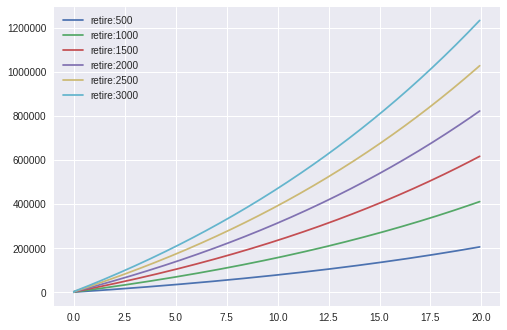

In [0]:

import matplotlib.pyplot as plt
#varying monthly investments
def displayRetireVM(monthlies,rate,terms):
    plt.figure('retireMonth')
    plt.clf() #clear previous figures
    for monthly in monthlies:
        xvals,yvals = retire(monthly,rate,terms)
        plt.plot(xvals,yvals,label ='retire:'+str(monthly))
        plt.legend(loc ='upper left')
        
displayRetire([500,1000,1500,2000,2500,3000],0.05,20*12)

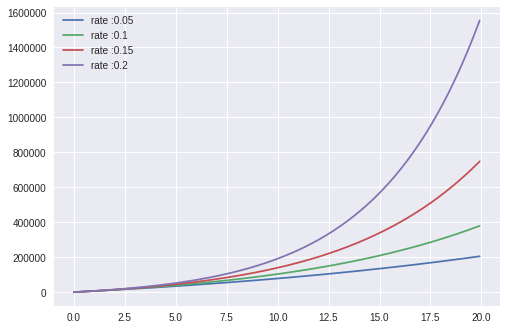

In [0]:
import matplotlib.pyplot as plt
#varying interest rates
def displayRetireVR(monthlies,rate,terms):
    plt.figure('retireMonth')
    plt.clf() #clear previous figures
    for arate in rate:
        xvals,yvals = retire(monthlies,arate,terms)
        plt.plot(xvals,yvals,label ='rate :'+str(arate))
        plt.legend(loc ='upper left')
        
        
displayRetireVR(500,[0.05,0.10,0.15,0.20],20*12)

 Stochastic process
 
 A Stochastic model is one in which randomness is present, and variable states are not described by unique values, but rather by probability distributions. The behavior of this model cannot be entirely predicted

In [0]:
#generate random even number from 0 <= x<100
import random

random.randrange(10,21,2)

16

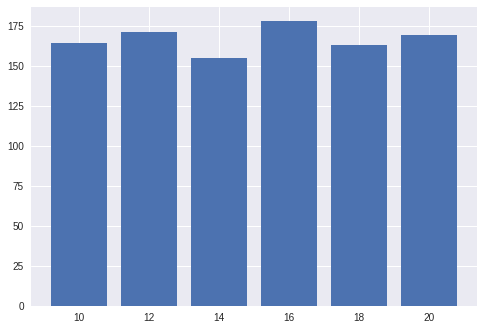

In [0]:
import matplotlib.pyplot as plt

result=[]

for _ in range(0,1000):
    result.append(random.randrange(10,21,2))

#x = [a for a in range(10,21,2)]

from collections import Counter
result = sorted(result)
#print(result)
y = Counter(result)

plt.bar(range(len(y)), list(y.values()), align='center')
plt.xticks(range(len(y)), list(y.keys()))

plt.show()

Excerise 4 

In [0]:
import random

def dist1():
    return random.random() * 2 - 1

def dist2():
    if random.random() > 0.5:
        return random.random()
    else:
        return random.random() - 1 
    
def dist3():
    return int(random.random() * 10)

def dist4():
    return random.randrange(0, 10)

def dist5():
    return int(random.random() * 10)

def dist6():
    return random.randint(0, 10)

import numpy as np

def rundistribution(funname,no_itr=1000):
    x,y=[],[]
    for i in range(no_itr):
        x=np.append(x,i)
        y=np.append(y,funname())
    return x,y
        
print('done')

done


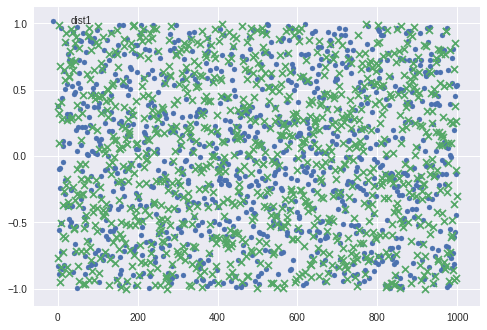

In [0]:
#printing all the distributions 

import matplotlib.pyplot as plt

for _ in range(6):
    plt.figure('all distributions')




plt.figure('dist1')
plt.clf() #clear previous figures
xvals,yvals = rundistribution(dist1)




#plt.plot(xvals,yvals,label ='dist1',)
plt.scatter(xvals, yvals,label ='dist1', marker='.', s=10)
plt.legend(loc ='upper left')

x2vals,y2vals = rundistribution(dist2)

plt.scatter(x2vals,y2vals,label ='dist2', marker='x')
plt.show()

**Probability**

1. Probabilites are always in range 0 to 1.

2. If probability of an event occuring is p, then probability of it not occuring must be 1-p.

3. when events are **independent** of each other , the probability of the events occuring is equal to the product of the probability of each of the events occuring.

Two events are said to be independent if the outcome of one event has no influence on the outcome of the other.


In [0]:
## defining roll a Die function and its test case
import random

def rollDie():
    return random.choice([1,2,3,4,5,6])

def testRoll(n=10):
    result =''
    for _ in range(n):
        result = result+str(rollDie())
    print(result)

In [0]:
##runn the test function for roll Die
testRoll()

2214252111


In [0]:
## A simulation of desired result.
## goal -- running rollDie n no of times i.e len(goal) times
## numTrials -- no of trials 
def runSim(goal,numTrials):
    total = 0
    for i in range(numTrials):
        result=''
        for _ in range(len(goal)):
            result +=str(rollDie())
            
            if result==goal:
                total += 1
        ## for a 6 face die        
    print('Actual probability =',round(1/(6**len(goal)),8))
    print('Estima probability =',round((total/numTrials),8))

runSim('111',1000)


Actual probability = 0.00462963
Estima probability = 0.00462


it takes a lot of trials(by increasing the numTrials) to get a good estimate of the frequency of occurence of a rare event.

Sample probability and actual probability are different.

**Simulation Models**

A description of computations that provide useful information about the possible behaviours of th e system being modeled.

Its descriptive in nature i.e they are used to tell what might happen . They don't tell us how to make something happen.

A simulation is only an approximation to reality.

"All models are wrong, but some are useful." --George Box

--- to model systems that are mathematically intractable
--- to extract useful intermediate results
--- lend themselves to development by successive refinement and "what if " questions.

**A Random walk down Wall Street.** book to read



Simulating a random walk

In [0]:
## a class to give location

class location(object):
    '''return the new location after a step is taken'''
    def __init__(self,x,y):
        '''x and y are floats'''
        self.x = x
        self.y = y
        
    def move(self,deltaX,deltaY):
        '''deltaX and deltaY are floats'''
        return location(self.x+deltaX,self.y+deltaY)
    
    def getX(self):
        return self.x
    
    def getY(self):
        return self.y
    
    def distFrom(self,other):
        ox = other.x
        oy = other.y
        xDist = self.x - ox
        yDist = self.y - oy
        return (xDist**2+yDist**2)**0.5
    
    def __str__(self):
        return '('+str(self.x)+','+str(self.y)+')' 

In [0]:
#Drunk person class

class Drunk(object):
    def __init__(self,name):
        self.name=name
        
    def __str__(self):
        return 'The name is '+self.name

# inherit the above class and create two types of drunks

import random

class UsualDrunk(Drunk):
    #no bias in direction of step taken
    def takeStep(self):
        #[N,S,E,W]
        stepChoice=[(0.0,1.0),(0.0,-1.0),(1.0,0.0),(-1.0,0.0)]
        return random.choice(stepChoice)
    
class ColdDrunk(Drunk):
    #bias in direction of step taken
    
    def takeStep(self):
        #[N,S,E,W]
        stepChoice=[(0.0,0.9),(0.0,-1.1),(1.0,0.0),(-1.0,0.0)]  
        return random.choice(stepChoice)
    

The field class, was made to make the location of a person in a field an attribute of the field rather than an attribute of the person.

In [0]:
class Field(object):
    '''Field class tracks all the drunks'''
    
    def __init__(self):
        '''Create an empty dictonary the key is the drunk and
        value is the location'''
        self.drunks={}
        
    def addDrunk(self,drunk,loc):
        '''Add the drunk to the field with location'''
        
        if drunk in self.drunks:
            raise ValueError('Drunk already on field change position')
        
        else:
            # if drunk not present on field then add to the field
            self.drunks[drunk]=loc
    
    def getLoc(self,drunk):
        '''get the location of a drunk of field'''
        
        if drunk not in self.drunks:
            raise ValueError('Drunk not on field')
            
        return self.drunks[drunk]
    
    
    def moveDrunk(self,drunk):
        '''make the drunk take a step'''
        # check whether drunk is in field
        if drunk not in self.drunks:
            raise ValueError('Drunk not in field')
            
        xDist,yDist = drunk.takeStep()
        currentLocation = self.drunks[drunk]
        
        #use move method of location to get new location
        self.drunks[drunk]=currentLocation.move(xDist,yDist)
     

In [0]:
#simulate a single Single walk

def walk(f,d,numSteps):
    '''f is field 
       d is person 
       numSteps is no of steps a positive number
       Move d numSteps times return the distance between start and end
       '''
    #get the current location of the drunk
    start = f.getLoc(d)
    
    for _ in range(numSteps):
        f.moveDrunk(d)
    return start.distFrom(f.getLoc(d))

In [0]:
# simulate multiple walks 

def simWalks(numSteps,numTrials,dClass):
    '''Assume numSteps and numTrials are positive int
       dClass is a subtype of Drunk class
       numTrials -- simulates walk of steps numSteps numTrials no of times
    '''
    #create an object
    Homer = dClass('John')
    #initial location
    origin = location(0,0)
    distances =[]
    for _ in range(numTrials):
        
        # create a field
        f = Field()
        
        #add the drunk to the field at origin
        f.addDrunk(Homer,origin)
        distances.append(walk(f,Homer,numSteps))
    
    return distances
    

In [0]:
###doing the test run

def drunkTest(walkLengths,numTrials,dClass):
    '''Assume walklength is a tuple with length of walks
       numTrials is the no of trials
       dClass is type of drunk UsualDrunk or ColdDrunk
       
       for each number of steps in walkLengths, runs simWalks with numTrials 
       walks and prints results
    '''
    
    for numSteps in walkLengths:
        distances = simWalks(numSteps,numTrials,dClass)
        
        print(dClass.__name__,' walks ',numSteps,' steps')
        print('Mean =',round(sum(distances)/len(distances),4), \
        'Max =',max(distances), \
         'Min =',min(distances) )
        

In [18]:
### testing the walks for the drunks

drunkTest((10,100,1000),1000,UsualDrunk)

UsualDrunk  walks  10  steps
Mean = 2.738 Max = 8.0 Min = 0.0
UsualDrunk  walks  100  steps
Mean = 8.8025 Max = 25.96150997149434 Min = 0.0
UsualDrunk  walks  1000  steps
Mean = 28.6174 Max = 78.54934754662193 Min = 1.4142135623730951
